# Census Income Data


<img src="https://sc.cnbcfm.com/applications/cnbc.com/resources/files/2018/12/06/acs-5yr-mhi-all-counties.jpg" width="100%" height="300">

### Data Set Information:

- Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

- Prediction task is to determine whether a person makes over 50K a year.

### Machine Learning Models:
- Logistic Regression
- SVC Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Bagging Classfier
- ExtraTreesClassifier
- Voting Classifier


### Model Building Lifecycle
- Data Ingestion/Gathering
- EDA
- Preprocessing
- Feature Selection
- Model Building
- Evaluation of the model


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.despine(left=True, right=True, bottom=True, top=True)
sns.set_style('white')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn('ALERT!')
warnings.warn('CAUTION!')

<Figure size 432x288 with 0 Axes>

In [2]:
columns=['age','work_class','final_weigth','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Income']
test_columns=['age','work_class','final_weigth','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']

In [3]:
df_train=pd.read_csv(r'C:\Users\prasa\Desktop\Prasath\INeuron\FSDS_Bootcamp_2022\FSDS BootCamp\Nov Machine Learning Algorithms\13th Nov Live Class Random Forest\13th Nov FSDS bootcamp-20221114T151600Z-001\Assignment\dataset\adult.data',sep=',',names=columns,header=None)
df_test=pd.read_csv(r'C:\Users\prasa\Desktop\Prasath\INeuron\FSDS_Bootcamp_2022\FSDS BootCamp\Nov Machine Learning Algorithms\13th Nov Live Class Random Forest\13th Nov FSDS bootcamp-20221114T151600Z-001\Assignment\dataset\adult.test',sep=',',names=test_columns,header=0,index_col=False)


In [4]:
df_test.head()

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [5]:
df_train.head()

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df=pd.concat([df_train,df_test],axis=0,ignore_index=True)

In [7]:
df.shape

(48842, 15)

In [8]:
df.memory_usage()

Index                128
age               390736
work_class        390736
final_weigth      390736
education         390736
education_num     390736
marital_status    390736
occupation        390736
relationship      390736
race              390736
sex               390736
capital_gain      390736
capital_loss      390736
hours_per_week    390736
native_country    390736
Income            390736
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   work_class      48842 non-null  object
 2   final_weigth    48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df.describe()

,age,final_weigth,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isna().sum()

age                   0
work_class            0
final_weigth          0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country        0
Income            16281
dtype: int64

In [12]:
df.tail()

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,NaN
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,NaN
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,NaN
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,NaN
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,NaN


In [13]:
df['work_class'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: work_class, dtype: int64

In [14]:
df[df['work_class']==' ?']

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,?,265201,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,NaN
48769,21,?,212661,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,NaN
48800,73,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,NaN
48812,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,NaN


In [15]:
df['work_class'].mode().values[0]

' Private'

In [16]:
df.tail()

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,NaN
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,NaN
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,NaN
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,NaN
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,NaN


In [17]:
df[df['work_class']==' ?']['work_class'].values

array([' ?', ' ?', ' ?', ..., ' ?', ' ?', ' ?'], dtype=object)

In [18]:
df['work_class'].replace(to_replace=df[df['work_class']==' ?']['work_class'].values,value=df['work_class'].mode().values[0],inplace=True)

In [19]:
df[df['occupation']==' ?']['occupation'].values

array([' ?', ' ?', ' ?', ..., ' ?', ' ?', ' ?'], dtype=object)

In [20]:
df['occupation'].mode()

0     Prof-specialty
Name: occupation, dtype: object

In [21]:
df['occupation'].replace(to_replace=df[df['occupation']==' ?']['occupation'].values,value=df['occupation'].mode().values[0],inplace=True)

In [22]:
df[df['education']==' Bachelors']

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,NaN
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,NaN
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,NaN
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,NaN


In [23]:
columns

['age',
 'work_class',
 'final_weigth',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'Income']

In [24]:
cat_variable=df.dtypes[df.dtypes=='object'].index

In [25]:
cat_variable

Index(['work_class', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'Income'],
      dtype='object')

In [26]:
for i in cat_variable:
    df[i]=df[i].str.strip()

In [27]:
print(f"The total number of Categorical Variables are {len(cat_variable)}\n")
for i in cat_variable:
    print(f"The {i} has the following category counts:\n")
    print(df[i].value_counts())
    print('\n')

The total number of Categorical Variables are 9

The work_class has the following category counts:

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: work_class, dtype: int64


The education has the following category counts:

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


The marital_status has the following category counts:

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-

In [28]:
df[cat_variable].describe()

,work_class,education,marital_status,occupation,relationship,race,sex,native_country,Income
count,48842,48842,48842,48842,48842,48842,48842,48842,32561
unique,8,16,7,14,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,43832,24720


In [29]:
df[df['Income']=='<=50K']['Income'].values

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [30]:
df['Income'].replace(to_replace=df[df['Income']=='<=50K']['Income'].values,value=1,inplace=True)
df['Income'].replace(to_replace=df[df['Income']=='>50K']['Income'].values,value=0,inplace=True)

In [31]:
df.head()

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1.0


In [32]:
df.dtypes

age                 int64
work_class         object
final_weigth        int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
Income            float64
dtype: object

In [33]:
numerical_var=df.dtypes[df.dtypes!='object'].index

In [34]:
print("The Statiscal Anaylsis for each variable of Numerical Columns are:\n")
for i in numerical_var:
    print(f"The {i} Feature Descriptive Statistics:\n")
    print(f"The Maximum value of {i} in {df[df['age']==df['age'].max()].age.values[0]} feature")
    print(f"The Average value of {i} in {df[i].mean()} feature")
    print(f"The Median value of {i} in {df[i].median()} feature")
    print(f"The Minimum value of {i} in {df[df['age']==df['age'].min()].age.values[0]} feature")
    print(f"The Total Number of Duplicates from {i} feature is {df[i].duplicated().sum()}\n\n")

The Statiscal Anaylsis for each variable of Numerical Columns are:

The age Feature Descriptive Statistics:

The Maximum value of age in 90 feature
The Average value of age in 38.64358543876172 feature
The Median value of age in 37.0 feature
The Minimum value of age in 17 feature
The Total Number of Duplicates from age feature is 48768


The final_weigth Feature Descriptive Statistics:

The Maximum value of final_weigth in 90 feature
The Average value of final_weigth in 189664.13459727284 feature
The Median value of final_weigth in 178144.5 feature
The Minimum value of final_weigth in 17 feature
The Total Number of Duplicates from final_weigth feature is 20319


The education_num Feature Descriptive Statistics:

The Maximum value of education_num in 90 feature
The Average value of education_num in 10.078088530363212 feature
The Median value of education_num in 10.0 feature
The Minimum value of education_num in 17 feature
The Total Number of Duplicates from education_num feature is 4882

In [35]:
df.corr()

,age,final_weigth,education_num,capital_gain,capital_loss,hours_per_week,Income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,-0.234037
final_weigth,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,0.009463
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,-0.335154
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,-0.223329
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,-0.150526
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,-0.229689
Income,-0.234037,0.009463,-0.335154,-0.223329,-0.150526,-0.229689,1.000000


In [36]:
num_var=numerical_var[:-1].values

In [37]:
num_var

array(['age', 'final_weigth', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week'], dtype=object)

<AxesSubplot: xlabel='Income', ylabel='age'>

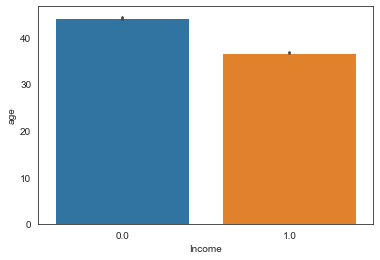

In [38]:
sns.barplot(x=df['Income'],y=df['age'],data=df)

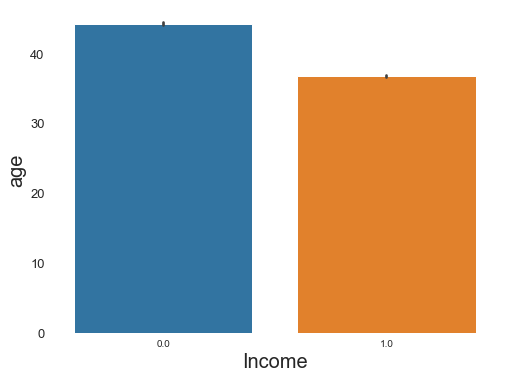

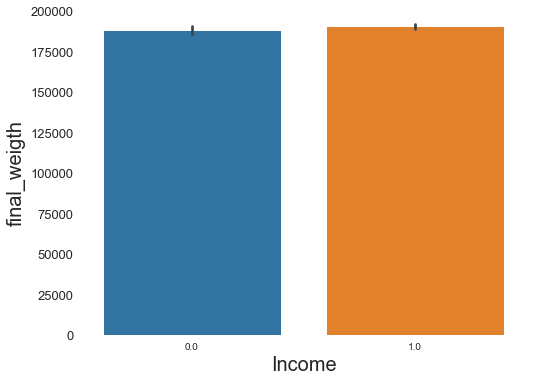

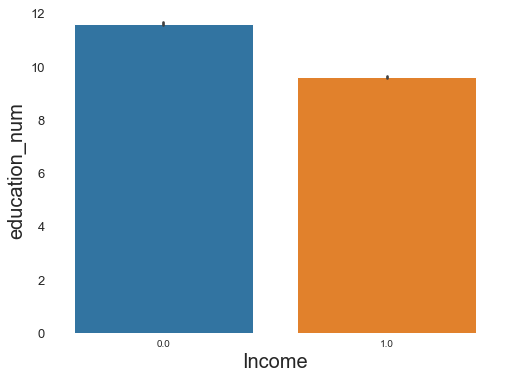

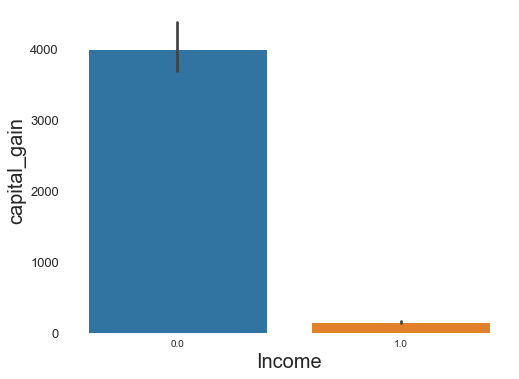

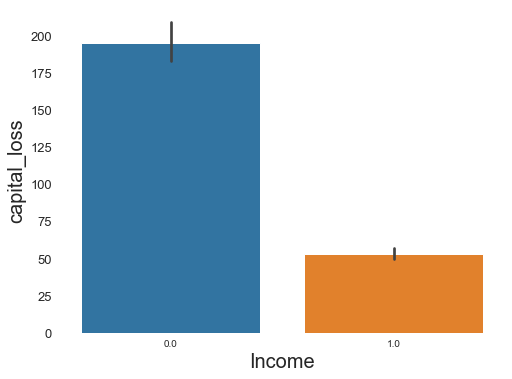

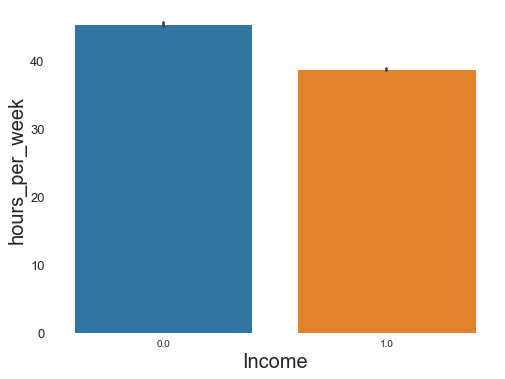

In [39]:
for i in num_var:
    fig, ax = plt.subplots(1,1, figsize=(8, 6))
    sns.barplot(x=df['Income'],y=df[i],data=df)
    plt.xlabel(f'Income', fontsize=20)
    plt.ylabel(f'{i}',fontsize=20)
    plt.yticks(fontsize=13)
    plt.box(False)
    

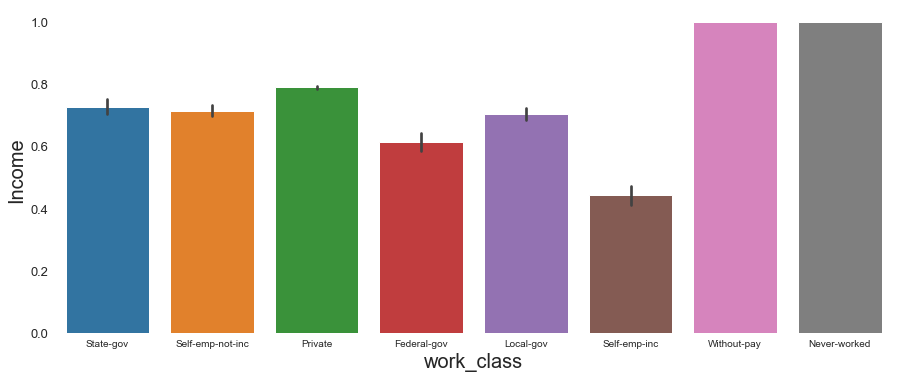

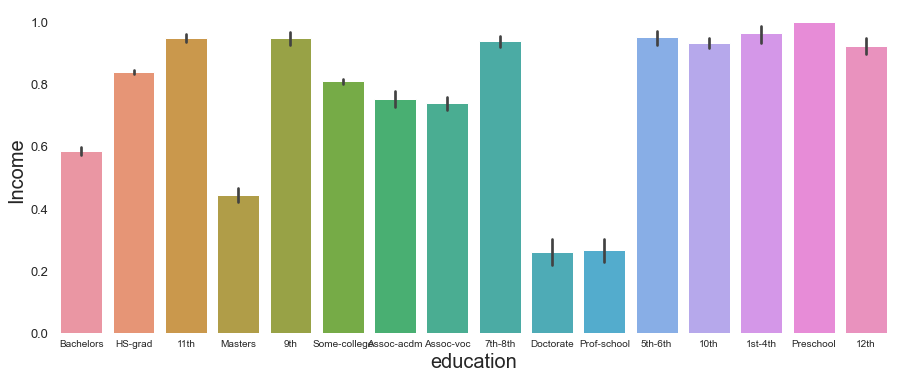

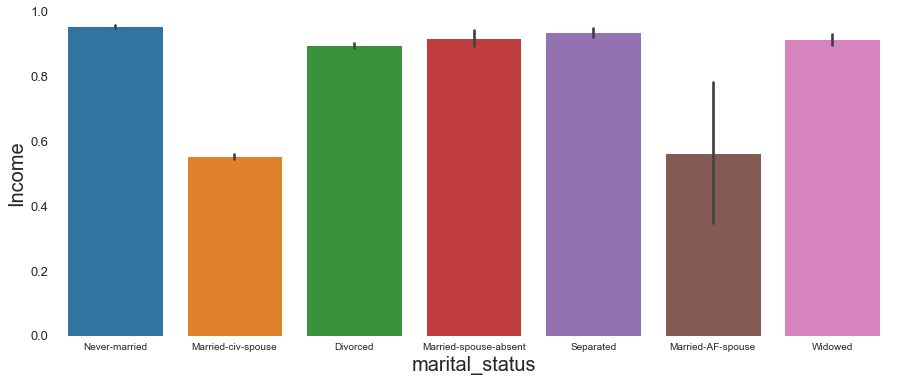

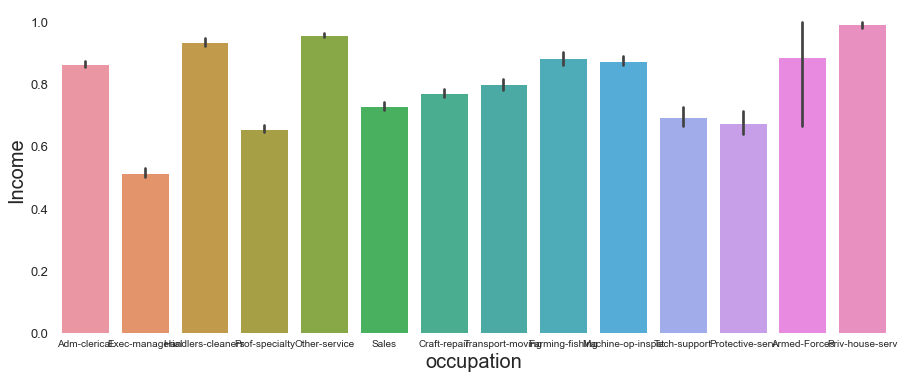

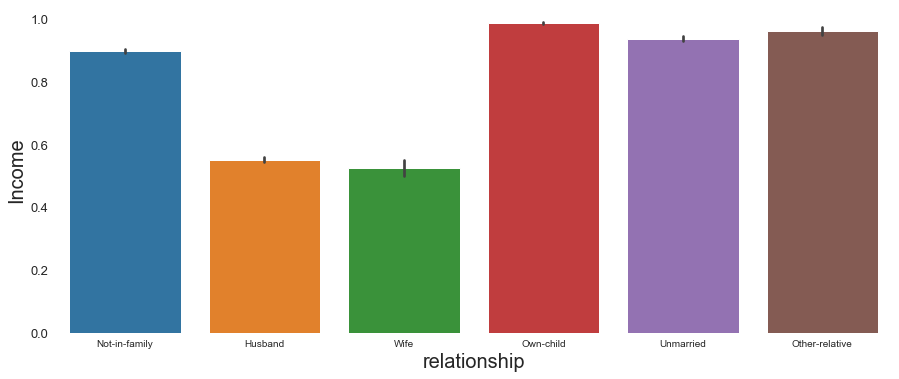

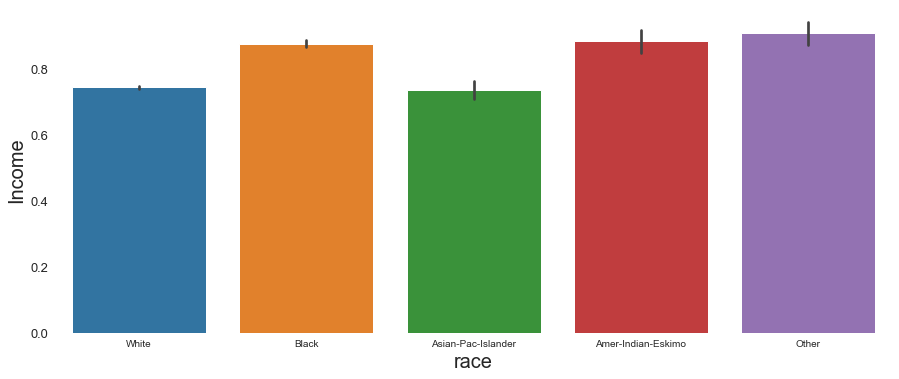

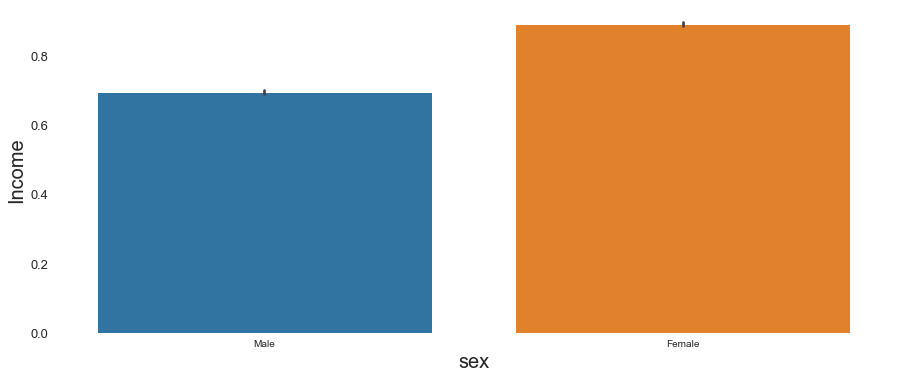

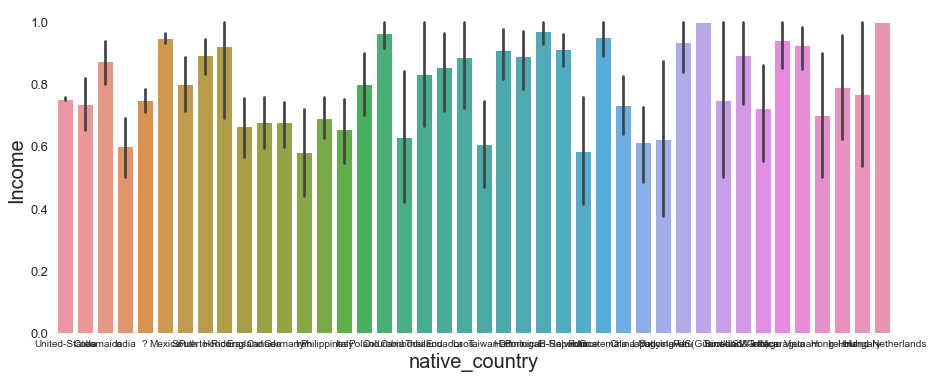

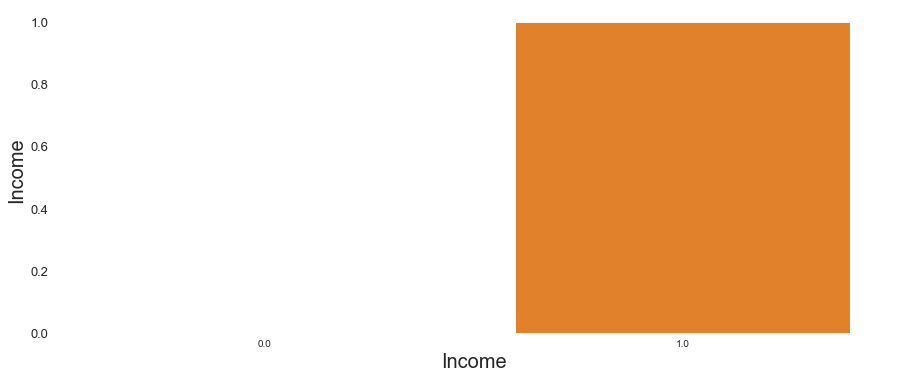

In [40]:
for i in cat_variable:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.barplot(x=df[i],y=df['Income'],data=df)
    plt.xlabel(f'{i}', fontsize=20)
    plt.ylabel(f'Income',fontsize=20)
    plt.yticks(fontsize=13)
    plt.box(False)

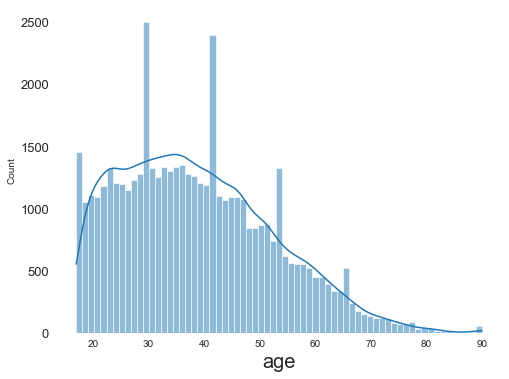

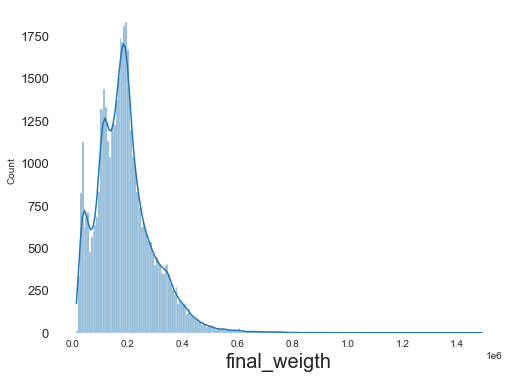

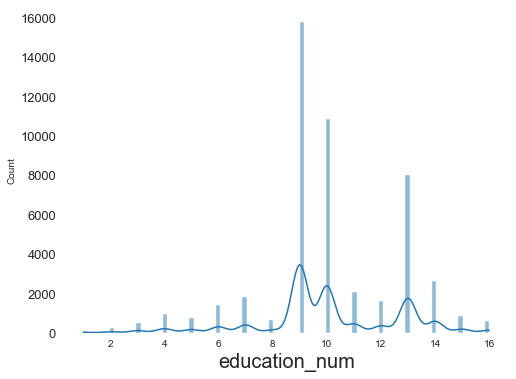

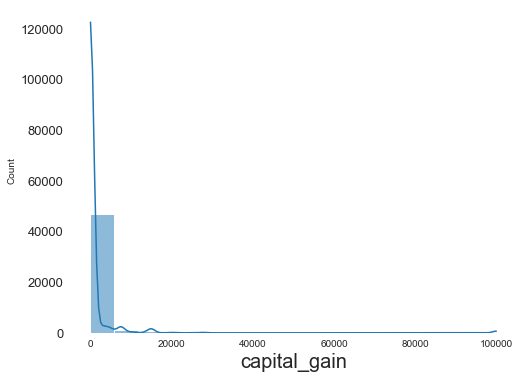

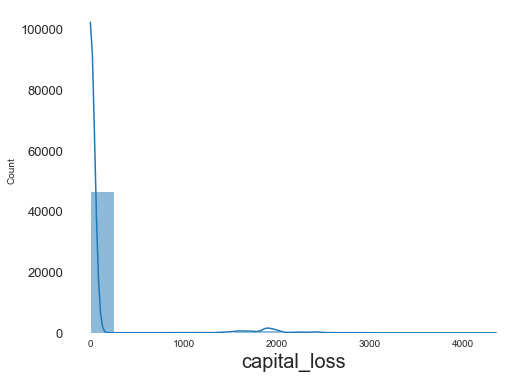

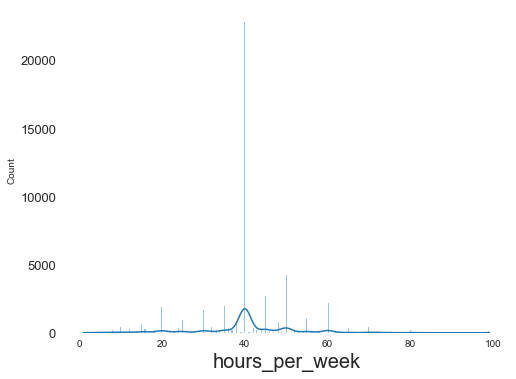

In [41]:
for i in num_var:
    fig, ax = plt.subplots(1,1, figsize=(8, 6))
    sns.histplot(df[i],kde=True)
    plt.xlabel(f'{i}', fontsize=20)
    plt.yticks(fontsize=13)
    plt.box(False)

In [42]:
def find_outliers(feature):
    q1,q3=df[feature].quantile([0.25,0.75])
    IQR=q3-q1
    lower_bound=q1-1.5*(IQR)
    upper_bound=q3+1.5*(IQR)
    return (lower_bound,upper_bound)

In [43]:
q1,q3=find_outliers('age')
q1,q3
len(df[(df['age']<q1)|( df['age']>q3)])

216

In [44]:
for i in num_var:
    lower_bound,upper_bound=find_outliers(i)
    print(f"The Lower Bound is {lower_bound} and the Upper Bound is {upper_bound}")
    length=len(df[(df[i]<q1)|( df[i]>q3)])
    print(f"The Total Outliers Lying in {i} Feature are {length}\n\n")
    

The Lower Bound is -2.0 and the Upper Bound is 78.0
The Total Outliers Lying in age Feature are 216


The Lower Bound is -62586.75 and the Upper Bound is 417779.25
The Total Outliers Lying in final_weigth Feature are 48842


The Lower Bound is 4.5 and the Upper Bound is 16.5
The Total Outliers Lying in education_num Feature are 0


The Lower Bound is 0.0 and the Upper Bound is 0.0
The Total Outliers Lying in capital_gain Feature are 4035


The Lower Bound is 0.0 and the Upper Bound is 0.0
The Total Outliers Lying in capital_loss Feature are 2282


The Lower Bound is 32.5 and the Upper Bound is 52.5
The Total Outliers Lying in hours_per_week Feature are 529




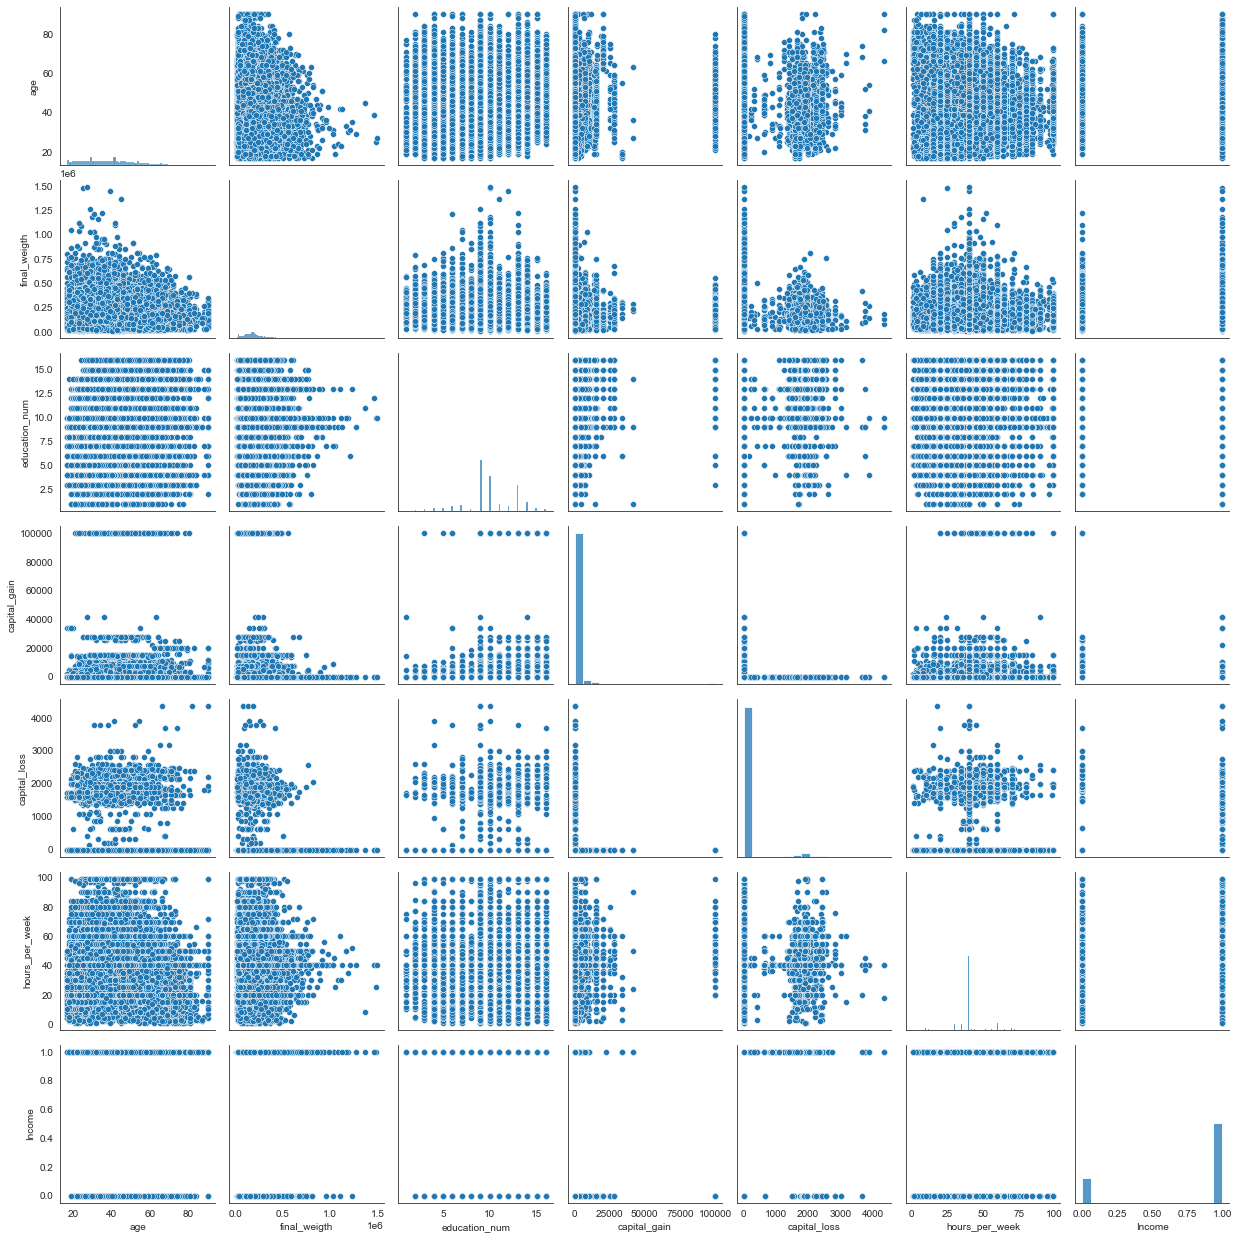

In [45]:
sns.pairplot(df)

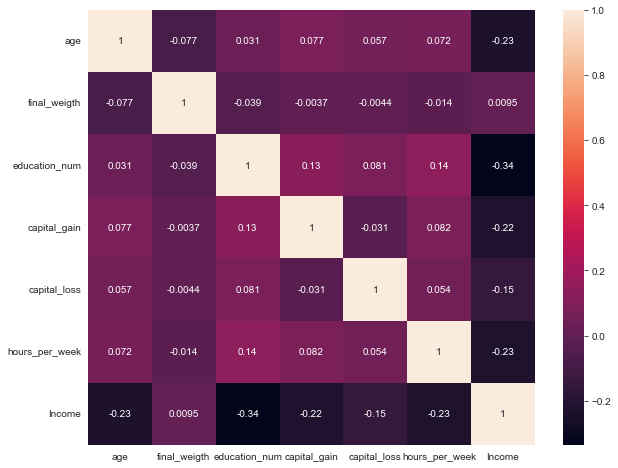

In [46]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [47]:
data=df.copy()

In [48]:
df=data

In [49]:
df.head()

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1.0


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder

LabelEncoder()

In [51]:
cat_variable=df.dtypes[df.dtypes=='object'].index

In [52]:
cat_variable

Index(['work_class', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [53]:
for i in cat_variable:
    df[i]=label_encoder.fit_transform(df[i])

In [54]:
df.head() 

,age,work_class,final_weigth,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39,1.0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,1.0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,1.0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,1.0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,5,1.0


In [55]:
temp_df=df[~df['Income'].isna()]

In [56]:
temp_df.isna().sum().sum()

0

In [57]:
X=temp_df.drop('Income',axis=1)

In [58]:
y=temp_df['Income']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
print(f"The Shape of the Training Data is {X_train.shape} and the output Feature is {y_train.shape}")
print(f"The Shape of the Testing Data is {X_test.shape} and the output Feature is {y_test.shape}")

The Shape of the Training Data is (21815, 14) and the output Feature is (21815,)
The Shape of the Testing Data is (10746, 14) and the output Feature is (10746,)


In [61]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar

StandardScaler()

In [62]:
scaled_X_train=scalar.fit_transform(X_train)

In [63]:
scaled_X_test=scalar.transform(X_test)

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor

LogisticRegression()

In [65]:
regressor.fit(scaled_X_train,y_train)

LogisticRegression()

In [66]:
regressor.score(scaled_X_train,y_train)

0.8238826495530598

In [67]:
regressor.intercept_

array([1.50602965])

In [68]:
regressor.coef_

array([[-0.47602821,  0.11068587, -0.05354157, -0.03295505, -0.8584081 ,
         0.34777154,  0.01931966,  0.17755024, -0.10123872, -0.43539399,
        -2.24177563, -0.26137456, -0.3825377 , -0.03950097]])

In [69]:
y1_pred=regressor.predict(scaled_X_test)

In [70]:
from sklearn.metrics import classification_report


In [71]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.45      0.55      2550
         1.0       0.85      0.94      0.89      8196

    accuracy                           0.83     10746
   macro avg       0.78      0.70      0.72     10746
weighted avg       0.81      0.83      0.81     10746



In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [81]:
ytrain_pred = regressor.predict_proba(scaled_X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = regressor.predict_proba(scaled_X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.8551427358616901
Logistic test roc-auc: 0.8541286041014746


### ROC Curve

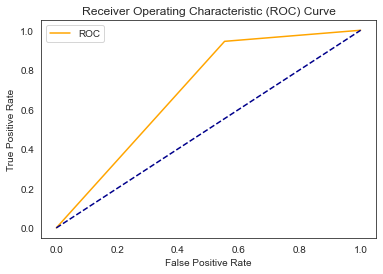

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y1_pred)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_pred,y_test)

0.8259817606551275

### Support Vector Classifier

In [74]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=42)
model

SVC(kernel='linear', random_state=42)

In [75]:
model.fit(scaled_X_train,y_train)

SVC(kernel='linear', random_state=42)

In [76]:
model.score(scaled_X_train,y_train)

0.8136603254641301

In [77]:
y_pred=model.predict(scaled_X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.821608040201005

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.33      0.46      2550
         1.0       0.82      0.98      0.89      8196

    accuracy                           0.82     10746
   macro avg       0.82      0.65      0.68     10746
weighted avg       0.82      0.82      0.79     10746



### ROC Curve

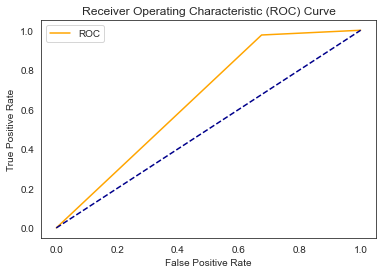

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

### Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
model.score(X_train,y_train)

1.0

[Text(0.7128216098235904, 0.9895833333333334, 'X[7] <= 0.5\ngini = 0.367\nsamples = 21815\nvalue = [5291, 16524]'),
 Text(0.488807188964246, 0.96875, 'X[4] <= 12.5\ngini = 0.495\nsamples = 8887\nvalue = [4002, 4885]'),
 Text(0.37291392777961574, 0.9479166666666666, 'X[10] <= 5095.5\ngini = 0.442\nsamples = 6177\nvalue = [2041, 4136]'),
 Text(0.28051118171175193, 0.9270833333333334, 'X[11] <= 1782.5\ngini = 0.417\nsamples = 5868\nvalue = [1739, 4129]'),
 Text(0.10172389464636207, 0.90625, 'X[4] <= 7.5\ngini = 0.402\nsamples = 5640\nvalue = [1574, 4066]'),
 Text(0.021185107677998673, 0.8854166666666666, 'X[3] <= 0.5\ngini = 0.179\nsamples = 874\nvalue = [87, 787]'),
 Text(0.010914835559385322, 0.8645833333333334, 'X[6] <= 11.5\ngini = 0.277\nsamples = 193\nvalue = [32, 161]'),
 Text(0.008261354232918214, 0.84375, 'X[2] <= 199643.5\ngini = 0.23\nsamples = 158\nvalue = [21, 137]'),
 Text(0.006018205070337772, 0.8229166666666666, 'X[2] <= 198099.5\ngini = 0.301\nsamples = 92\nvalue = [17, 7

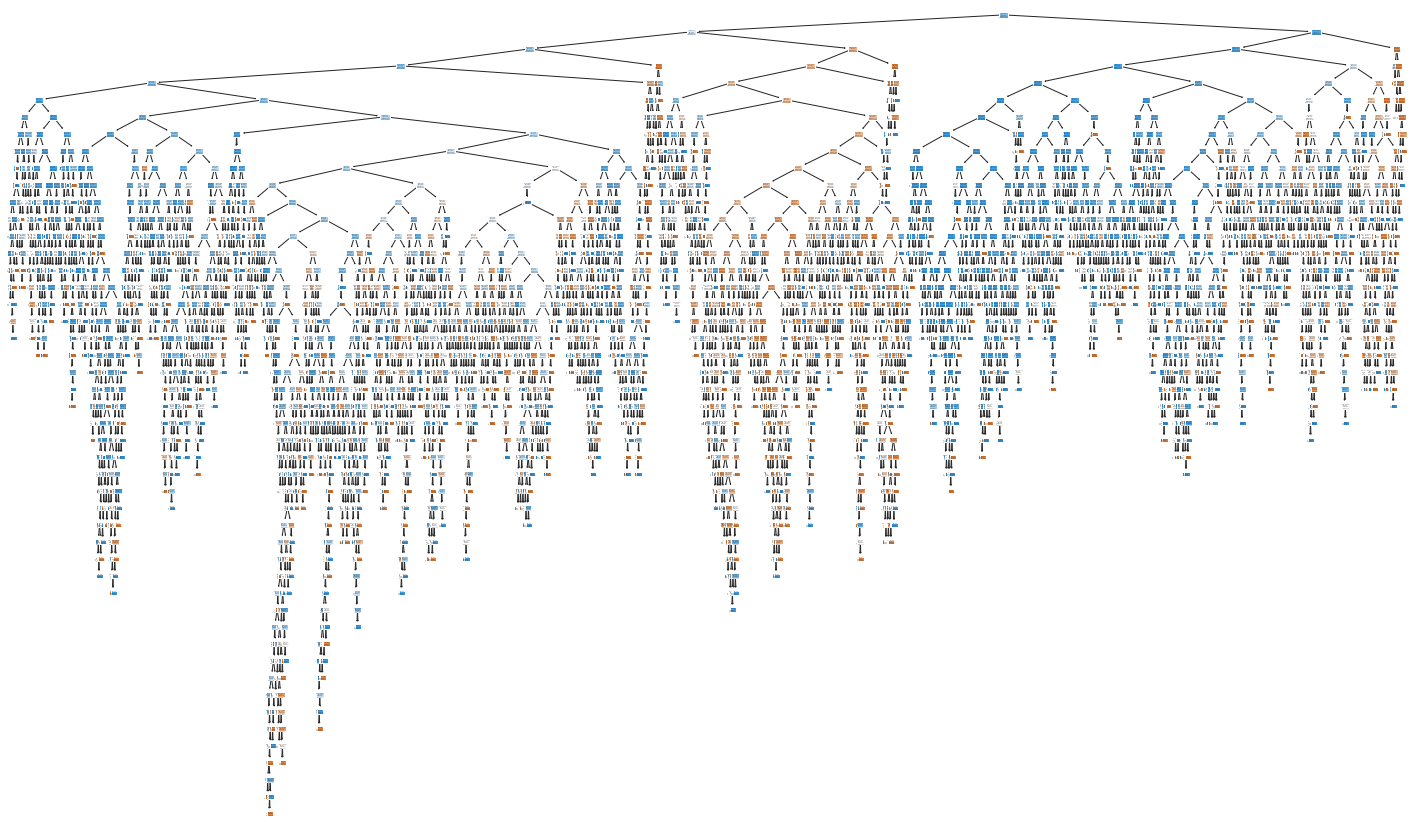

In [90]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [92]:
y_predict=model.predict(X_test)

In [93]:
accuracy_score(y_test,y_predict)

0.8073701842546064

In [95]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.59      0.62      0.61      2550
         1.0       0.88      0.86      0.87      8196

    accuracy                           0.81     10746
   macro avg       0.73      0.74      0.74     10746
weighted avg       0.81      0.81      0.81     10746



### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [97]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
y_pred_rf=Rf_model.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred_rf)

0.8555741671319561

In [100]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.73      0.63      0.67      2550
         1.0       0.89      0.93      0.91      8196

    accuracy                           0.86     10746
   macro avg       0.81      0.78      0.79     10746
weighted avg       0.85      0.86      0.85     10746



### Bagging Classifier

In [102]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0).fit(X_train,y_train)


In [103]:
y_predict_bagging=model_bagging_svc.predict(X_test)

In [104]:
accuracy_score(y_test,y_predict_bagging)

0.7968546435883119

In [105]:
print(classification_report(y_test,y_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.99      0.15      0.25      2550
         1.0       0.79      1.00      0.88      8196

    accuracy                           0.80     10746
   macro avg       0.89      0.57      0.57     10746
weighted avg       0.84      0.80      0.73     10746



### Extra Trees Classifier

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [122]:
clf.fit(X_train,y_train)

ExtraTreesClassifier(random_state=0)

In [123]:
clf.score(X_train,y_train)

1.0

In [108]:
y_predict_clf=clf.predict(X_test)

In [109]:
accuracy_score(y_test,y_predict_clf)

0.8458030895216825

In [110]:
print(classification_report(y_test,y_predict_bagging))

              precision    recall  f1-score   support

         0.0       0.99      0.15      0.25      2550
         1.0       0.79      1.00      0.88      8196

    accuracy                           0.80     10746
   macro avg       0.89      0.57      0.57     10746
weighted avg       0.84      0.80      0.73     10746



### Voting Classifier

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[ ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

In [112]:
y_predict_eclf1=eclf1.predict(X_test)

In [113]:
accuracy_score(y_test,y_predict_eclf1)

0.8179787828029034

In [114]:
print(classification_report(y_test,y_predict_eclf1))

              precision    recall  f1-score   support

         0.0       0.79      0.32      0.45      2550
         1.0       0.82      0.97      0.89      8196

    accuracy                           0.82     10746
   macro avg       0.81      0.65      0.67     10746
weighted avg       0.81      0.82      0.79     10746



From the Model Building Stage We can Conclude the Model with Random Forest Classifier got the maximum score of 85% so we can use this model for productionizing our application